# Impact of the number of samples on the model less attack performance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle as pickle
import sys

# Use this to load our modules.
module_path = os.path.abspath(os.path.join(os.getcwd(), '../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
def get_results_randomized_target_attack_model_less_only(nbrs_columns, experiment_path, nbr_samples,
                                         constraints_scenario='column'):
    print(f'\nLoading results \n')
    randomized_target_results_paths = [f'{experiment_path}/cols-{nbr_columns}/{constraints_scenario}/' + \
                                       f'nt-1000_nb-3_ns-{nbr_samples}.pickle'
                                       for n, nbr_columns in enumerate(nbrs_columns)]
    
    randomized_target_results = dict()

    for n, path in enumerate(randomized_target_results_paths):
        if not os.path.exists(path):
            print(path)
            break
        print(f'Found results for {path}...')
        with open(path, 'rb') as f:
            randomized_target_results[nbrs_columns[n]] = pickle.load(f)
    
    assert 3 in randomized_target_results, 'ERROR: The results for n=3 columns are not available.'
    methods = randomized_target_results[3]['accuracy'].keys()
    accuracy = {method: {n: result['accuracy'][method] for n, result in randomized_target_results.items()}
                for method in methods}
    return accuracy

In [3]:
experiment_path = f'../../experiments/randomized_target_attack_model_less_only'
nbrs_samples = [1, 2, 5, 10,20,50,100,200,500,1000]
nbrs_columns = [3]
accuracies = {}
for nbr_samples in nbrs_samples:
    accuracies[nbr_samples] = get_results_randomized_target_attack_model_less_only(nbrs_columns, experiment_path, nbr_samples,
                                         constraints_scenario='column')


Loading results 

Found results for ../../experiments/randomized_target_attack_model_less_only/cols-3/column/nt-1000_nb-3_ns-1.pickle...

Loading results 

Found results for ../../experiments/randomized_target_attack_model_less_only/cols-3/column/nt-1000_nb-3_ns-2.pickle...

Loading results 

Found results for ../../experiments/randomized_target_attack_model_less_only/cols-3/column/nt-1000_nb-3_ns-5.pickle...

Loading results 

Found results for ../../experiments/randomized_target_attack_model_less_only/cols-3/column/nt-1000_nb-3_ns-10.pickle...

Loading results 

Found results for ../../experiments/randomized_target_attack_model_less_only/cols-3/column/nt-1000_nb-3_ns-20.pickle...

Loading results 

Found results for ../../experiments/randomized_target_attack_model_less_only/cols-3/column/nt-1000_nb-3_ns-50.pickle...

Loading results 

Found results for ../../experiments/randomized_target_attack_model_less_only/cols-3/column/nt-1000_nb-3_ns-100.pickle...

Loading results 

Found resu

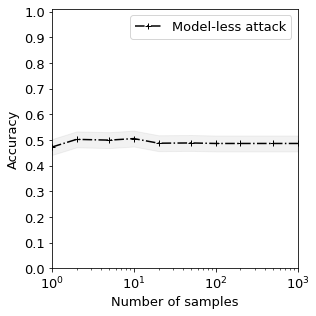

In [4]:
accuracies_by_nbr_samples = {'uniform_prior_empirical':[]}
for nbr_samples in nbrs_samples:
    accuracies_by_nbr_samples['uniform_prior_empirical'].append(accuracies[nbr_samples]['uniform_prior_empirical'][3])
        
fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))

markers = np.array(['+'])
linestyles = ['-.']

x = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
y = accuracies_by_nbr_samples['uniform_prior_empirical'] 
y_lower, y_upper = [],[]
for value in y:
    std_error = 1.96*np.sqrt(1/1000*value*(1-value))
    y_lower.append(value - std_error)
    y_upper.append(value + std_error)
ax.plot(x, y, color='k', marker=markers[0], ls=linestyles[0], label='Model-less attack')
ax.fill_between(x, y1=y_lower, y2=y_upper, color='gray', alpha=0.1)
ax.set_xscale('log')
ax.set_xlim(1, 1000)
ax.set_ylim(0, 1.01)
ax.set_xlabel('Number of samples', fontsize=13)
ax.set_ylabel('Accuracy', fontsize=13)
yticks = np.arange(0, 1.01, 0.1)
ax.set_yticks(yticks)
ax.set_yticklabels([f'{t:.1f}' for t in yticks], fontsize=13)
ax.tick_params(axis = 'both', labelsize = 13)
ax.legend(fontsize=13)

plt.tight_layout()
plt.savefig(f'../../plots/model_less_analysis_samples.pdf', bbox_inches='tight')
plt.savefig(f'../../plots/model_less_analysis_samples.png', bbox_inches='tight')
plt.show()